In [1]:
from fastai.vision.all import *
import glob
from pathlib import Path
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load model
predictor = load_learner("models/best_model.pkl")
# load test paths
test_path = glob.glob("data/test/*/*")
test_df = pd.DataFrame(test_path, columns=["path"])
test_df["label"] = test_df["path"].apply(lambda x: Path(x).parent.name)
test_df.head()

path  \
0      data/test\butterfly\e030b20929e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg   
1  data/test\butterfly\e830b30a20f5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg   
2    data/test\butterfly\e831b50f2df71c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg   
3      data/test\butterfly\e832b10a2fe90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg   
4  data/test\butterfly\e832b10e2efc043ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg   

       label  
0  butterfly  
1  butterfly  
2  butterfly  
3  butterfly  
4  butterfly

In [3]:
# test model
predicts = []
for i in tqdm(range(len(test_df))):
    path = test_df["path"][i]
    predict = predictor.predict(path)
    predicts.append(predict[0])
test_df["predict"] = predicts

  0%|          | 0/5236 [00:00<?, ?it/s]

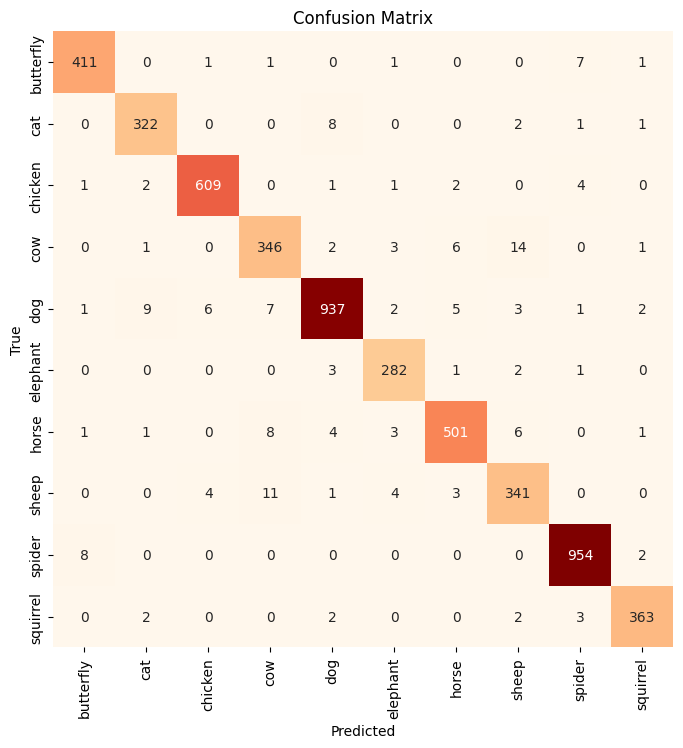

In [11]:
# confusion matrix
cm = confusion_matrix(test_df["label"], test_df["predict"])
# cm_display = ConfusionMatrixDisplay(cm, display_labels=predictor.dls.vocab).plot(cmap="OrRd", colorbar=False)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="OrRd", xticklabels=predictor.dls.vocab, yticklabels=predictor.dls.vocab, cbar=False)
plt.xticks(rotation='vertical')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [5]:
print(classification_report(test_df["label"], test_df["predict"]))

              precision    recall  f1-score   support

   butterfly       0.97      0.97      0.97       422
         cat       0.96      0.96      0.96       334
     chicken       0.98      0.98      0.98       620
         cow       0.93      0.93      0.93       373
         dog       0.98      0.96      0.97       973
    elephant       0.95      0.98      0.96       289
       horse       0.97      0.95      0.96       525
       sheep       0.92      0.94      0.93       364
      spider       0.98      0.99      0.99       964
    squirrel       0.98      0.98      0.98       372

    accuracy                           0.97      5236
   macro avg       0.96      0.96      0.96      5236
weighted avg       0.97      0.97      0.97      5236

